In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = "/content/Image.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

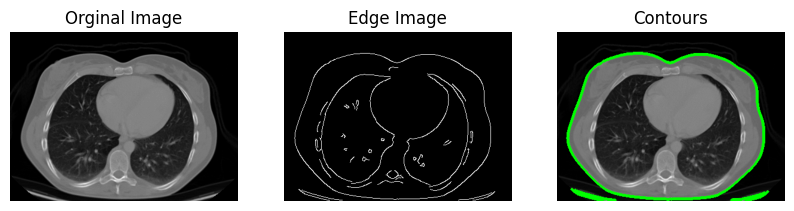

In [3]:
blur = cv2.GaussianBlur(image, (5, 5), 0)
edge = cv2.Canny(blur, 100, 200)
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)


plt.figure(figsize = (10, 12))


plt.subplot(1, 3, 1)
plt.imshow(image, cmap = "gray")
plt.title("Orginal Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(edge, cmap = "gray")
plt.title("Edge Image")
plt.axis("off")


plt.subplot(1, 3, 3)
plt.imshow(contour_image)
plt.title("Contours")
plt.axis("off")


plt.show()

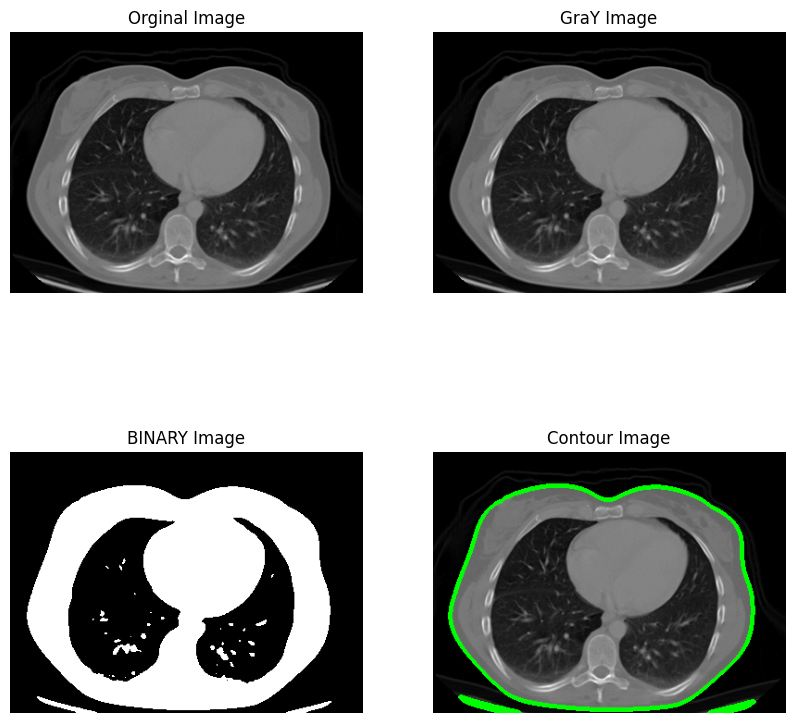

In [4]:
image_path = "/content/Image.png"
image = cv2.imread(image_path)
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, binary = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)


gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


fig, axs = plt.subplots(2, 2, figsize = (10, 10))



axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Orginal Image")
axs[0, 0].axis("off")


axs[0, 1].imshow(gray, cmap = "gray")
axs[0, 1].set_title("GraY Image")
axs[0, 1].axis("off")


axs[1, 0].imshow(binary, cmap = "gray")
axs[1, 0].set_title("BINARY Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Contour Image")
axs[1, 1].axis("off")


plt.show()

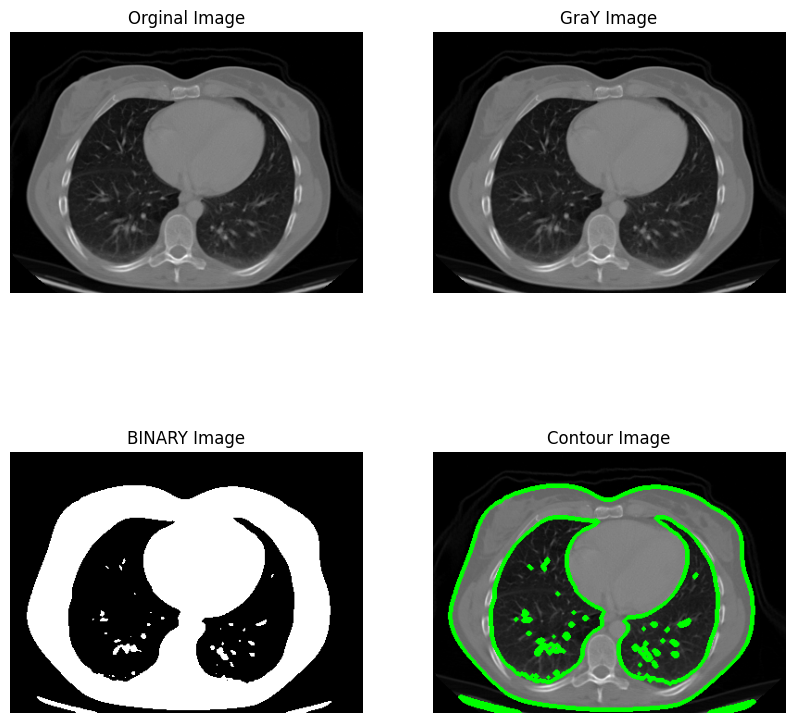

In [5]:
image_path = "/content/Image.png"
image = cv2.imread(image_path)
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, binary = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)


gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


fig, axs = plt.subplots(2, 2, figsize = (10, 10))



axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Orginal Image")
axs[0, 0].axis("off")


axs[0, 1].imshow(gray, cmap = "gray")
axs[0, 1].set_title("GraY Image")
axs[0, 1].axis("off")


axs[1, 0].imshow(binary, cmap = "gray")
axs[1, 0].set_title("BINARY Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Contour Image")
axs[1, 1].axis("off")


plt.show()

In [6]:
import os
file_size = os.path.getsize(image_path)
dimensions = image.shape
color_depth = image.dtype

metadata = {"File Size": file_size,
            "Dimension": dimensions,
            "Color":color_depth.itemsize * 8
            }


metadata


{'File Size': 83473, 'Dimension': (282, 381, 3), 'Color': 8}

In [7]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00


In [8]:
import pydicom
data = "/content/0.dcm"
image_dicom = pydicom.dcmread(data)
metadata = {de.tag: {"Name":de.name, "Value": de.value} for de in image_dicom.iterall() if hasattr(de, "name")}
metadata

/usr/local/lib/python3.10/dist-packages/pydicom/valuerep.py:443: UserWarning: The value length (32) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)


{(0008, 0008): {'Name': 'Image Type',
  'Value': ['ORIGINAL', 'PRIMARY', 'AXIAL']},
 (0008, 0016): {'Name': 'SOP Class UID', 'Value': '1.2.840.10008.5.1.4.1.1.2'},
 (0008, 0018): {'Name': 'SOP Instance UID',
  'Value': '44866763808476347459458861332287'},
 (0008, 0020): {'Name': 'Study Date', 'Value': '20160822'},
 (0008, 0050): {'Name': 'Accession Number', 'Value': '9294'},
 (0008, 0060): {'Name': 'Modality', 'Value': 'CT'},
 (0008, 0070): {'Name': 'Manufacturer', 'Value': 'TOSHIBA'},
 (0008, 0080): {'Name': 'Institution Name',
  'Value': '36992585882077568636440240079297'},
 (0008, 1030): {'Name': 'Study Description', 'Value': 'HEAD'},
 (0008, 103e): {'Name': 'Series Description', 'Value': ' Bone 2.0'},
 (0008, 1090): {'Name': "Manufacturer's Model Name", 'Value': 'Aquilion'},
 (0010, 0020): {'Name': 'Patient ID',
  'Value': '65861267898761825936981934122362'},
 (0010, 0040): {'Name': "Patient's Sex", 'Value': 'M'},
 (0010, 1010): {'Name': "Patient's Age", 'Value': '008Y'},
 (0018, 0